<a href="https://colab.research.google.com/github/JinLeeGG/Survival-Prediction-Model-for-AML-using-Gene-Expression-Data-from-TCGA/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://portal.gdc.cancer.gov/projects/TCGA-LAML

https://www.cbioportal.org/study/summary?id=laml_tcga_pan_can_atlas_2018

In [30]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Clinical data from dataset
clinical_df = pd.read_csv('/content/drive/MyDrive/Acute Myeloid Leukemia (TCGA, PanCancer Atlas)/datasets/laml_tcga_pan_can_atlas_2018/data_clinical_patient.txt', sep='\t', comment='#')
clinical_df

,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,WEIGHT,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
0,TCGA-AB-2989,NaN,LAML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,1:DECEASED,11.999868,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-AB-3008,LAML,LAML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,1:DECEASED,27.024361,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-AB-2863,LAML,LAML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,1:DECEASED,1.019167,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-AB-2844,LAML,LAML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,1:DECEASED,4.010915,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-AB-2955,LAML,LAML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,1:DECEASED,16.076536,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,TCGA-AB-2888,LAML,LAML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,0:LIVING,10.980702,0:ALIVE OR DEAD TUMOR FREE,NaN,NaN,NaN,NaN,NaN
196,TCGA-AB-2850,NaN,LAML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,1:DECEASED,2.005457,NaN,NaN,NaN,NaN,NaN,NaN
197,TCGA-AB-2971,LAML,LAML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,1:DECEASED,26.038071,NaN,NaN,NaN,NaN,NaN,NaN
198,TCGA-AB-2840,LAML,LAML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,1:DECEASED,0.920538,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PATIENT_ID                                  200 non-null    object 
 1   SUBTYPE                                     162 non-null    object 
 2   CANCER_TYPE_ACRONYM                         200 non-null    object 
 3   OTHER_PATIENT_ID                            0 non-null      float64
 4   AGE                                         0 non-null      float64
 5   SEX                                         0 non-null      float64
 6   AJCC_PATHOLOGIC_TUMOR_STAGE                 0 non-null      float64
 7   AJCC_STAGING_EDITION                        0 non-null      float64
 8   DAYS_LAST_FOLLOWUP                          0 non-null      float64
 9   DAYS_TO_BIRTH                               0 non-null      float64
 10  DAYS_TO_INITIA

In [33]:
rsem_df = pd.read_csv('/content/drive/MyDrive/Acute Myeloid Leukemia (TCGA, PanCancer Atlas)/datasets/laml_tcga_pan_can_atlas_2018/data_mrna_seq_v2_rsem.txt', sep='\t', comment='#')
rsem_df



,Hugo_Symbol,Entrez_Gene_Id,TCGA-AB-2803-03,TCGA-AB-2805-03,TCGA-AB-2806-03,TCGA-AB-2807-03,TCGA-AB-2808-03,TCGA-AB-2810-03,TCGA-AB-2811-03,TCGA-AB-2812-03,...,TCGA-AB-3000-03,TCGA-AB-3001-03,TCGA-AB-3002-03,TCGA-AB-3005-03,TCGA-AB-3006-03,TCGA-AB-3007-03,TCGA-AB-3008-03,TCGA-AB-3009-03,TCGA-AB-3011-03,TCGA-AB-3012-03
0,NaN,100130426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,100133144,-0.324751,0.572638,9.120017,5.892374,27.703947,0.725235,-0.324751,9.213171,...,5.873973,17.871178,9.711291,2.651229,3.873774,2.077649,16.909700,29.775759,17.716369,13.389132
2,UBE2Q2P2,100134869,-0.436849,-0.436849,8.853735,7.232627,15.704500,4.647010,3.504940,6.340629,...,0.796782,8.873421,3.601122,5.918779,8.137281,6.148142,15.335492,31.344883,8.711105,6.345575
3,HMGB1P1,10357,419.651650,419.812182,533.177649,775.751273,742.181326,667.780844,148.881530,536.349581,...,537.067281,437.370073,612.111865,436.536841,420.976459,357.992147,714.199146,481.134795,373.533101,393.514467
4,NaN,10431,1062.369221,516.945075,761.582563,656.106450,795.746840,1313.733190,1701.942971,1164.930942,...,575.036703,795.457978,701.968341,976.201282,893.317880,1356.109782,811.708451,625.457507,942.257260,1334.721961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYG11A,440590,19.587614,3.702016,2.732140,6.577307,2.303491,15.153494,0.986118,0.301440,...,2.130553,11.080261,3.977996,4.027647,1.278239,7.372156,0.301440,7.153142,20.578090,1.490848
20527,ZYG11B,79699,855.058740,1365.417710,579.510880,930.616155,1218.266026,613.910837,146.782082,938.957013,...,772.175251,837.944659,734.534134,526.357312,726.568026,776.473450,817.559831,1122.198779,882.608575,659.918435
20528,ZYX,7791,3366.161168,4322.843702,4093.187860,2673.347317,2735.320149,7437.852503,30801.742889,2879.253659,...,5022.429882,7292.157335,4632.197647,9275.469230,4294.131894,1748.967223,4022.122449,7291.924634,3411.714796,8646.670472
20529,ZZEF1,23140,2169.713046,3323.052993,3196.702352,3652.355153,2517.518799,2491.223868,2172.788319,2612.342410,...,2797.783955,4650.041218,3720.254798,3031.202112,3141.472931,3968.650664,3537.666597,4279.346589,4007.974241,4158.690264


In [34]:
rsem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20531 entries, 0 to 20530
Columns: 175 entries, Hugo_Symbol to TCGA-AB-3012-03
dtypes: float64(173), int64(1), object(1)
memory usage: 27.4+ MB


# Data Preprocessing

In [35]:
# 1. Clinical data processing
#   - (Patient ID, Overall patient survival status, Overall survival in months since initial diagnosis)

clinical_df = clinical_df[['PATIENT_ID', 'OS_STATUS', 'OS_MONTHS']]
clinical_df.head()

,PATIENT_ID,OS_STATUS,OS_MONTHS
0,TCGA-AB-2989,1:DECEASED,11.999868
1,TCGA-AB-3008,1:DECEASED,27.024361
2,TCGA-AB-2863,1:DECEASED,1.019167
3,TCGA-AB-2844,1:DECEASED,4.010915
4,TCGA-AB-2955,1:DECEASED,16.076536


In [36]:
# 2. RSEM Data Processing

# df_expression은 유전자 발현량 데이터프레임입니다.
# 'Hugo_Symbol'을 인덱스로 설정한 후 'EGR1' 행을 선택합니다.
# 그 후 PATIENT_ID를 컬럼으로 만들어줍니다.
rsem_df = rsem_df.set_index('Hugo_Symbol').loc['EGR1'].to_frame(name='EGR1_EXPRESSION')
rsem_df = rsem_df.reset_index().rename(columns={'index': 'PATIENT_ID'})

rsem_df['PATIENT_ID'] = rsem_df['PATIENT_ID'].str[:12]

rsem_df

,PATIENT_ID,EGR1_EXPRESSION
0,Entrez_Gene_,1958.000000
1,TCGA-AB-2803,23351.257257
2,TCGA-AB-2805,5628.231406
3,TCGA-AB-2806,47133.347877
4,TCGA-AB-2807,7456.035880
...,...,...
169,TCGA-AB-3007,17042.052267
170,TCGA-AB-3008,1473.919300
171,TCGA-AB-3009,17226.766141
172,TCGA-AB-3011,26999.965348


In [37]:
# Merge two dataframe

# 'inner' 방식으로 병합하여 두 데이터에 모두 존재하는 환자 정보만 남깁니다.
final_df = pd.merge(clinical_df, rsem_df, on='PATIENT_ID', how='inner')

In [38]:
final_df

,PATIENT_ID,OS_STATUS,OS_MONTHS,EGR1_EXPRESSION
0,TCGA-AB-3008,1:DECEASED,27.024361,1473.919300
1,TCGA-AB-2863,1:DECEASED,1.019167,7422.541548
2,TCGA-AB-2844,1:DECEASED,4.010915,2028.892453
3,TCGA-AB-2955,1:DECEASED,16.076536,64.795931
4,TCGA-AB-2897,0:LIVING,7.988954,4319.614535
...,...,...,...,...
168,TCGA-AB-2891,1:DECEASED,NaN,10524.629393
169,TCGA-AB-2888,0:LIVING,10.980702,16740.664600
170,TCGA-AB-2971,1:DECEASED,26.038071,9143.074087
171,TCGA-AB-2840,1:DECEASED,0.920538,7430.512263


In [54]:
# 결측치가 있는 행을 제거합니다.
final_df = final_df.dropna()

# OS_STATUS가 'DECEASED'이면 1, 'LIVING'이면 0으로 변환합니다.
final_df['EVENT'] = final_df['OS_STATUS'].str.contains('DECEASED').astype(int)

# 최종 데이터 확인
print("전처리 완료된 최종 데이터:")
final_df

전처리 완료된 최종 데이터:


,PATIENT_ID,OS_STATUS,OS_MONTHS,EGR1_EXPRESSION,EVENT
0,TCGA-AB-3008,1:DECEASED,27.024361,1473.919300,1
1,TCGA-AB-2863,1:DECEASED,1.019167,7422.541548,1
2,TCGA-AB-2844,1:DECEASED,4.010915,2028.892453,1
3,TCGA-AB-2955,1:DECEASED,16.076536,64.795931,1
4,TCGA-AB-2897,0:LIVING,7.988954,4319.614535,0
...,...,...,...,...,...
166,TCGA-AB-2849,0:LIVING,72.985502,850.867205,0
167,TCGA-AB-2817,1:DECEASED,8.975244,3165.820529,1
169,TCGA-AB-2888,0:LIVING,10.980702,16740.664600,0
170,TCGA-AB-2971,1:DECEASED,26.038071,9143.074087,1


In [60]:
print(final_df['EVENT'].value_counts())

EVENT
1    103
0     58
Name: count, dtype: int64


np.float64(10263.780393640218)

In [63]:
final_df['EGR1_EXPRESSION'].describe()

,EGR1_EXPRESSION
count,161.000000
mean,10263.780394
std,10295.565839
min,64.795931
25%,3165.820529
50%,7456.035880
75%,13722.201815
max,68966.816767


In [44]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=24d2ce3653138e0cc028f451674248a04c1302dd7affce46998f50a7a32c1eff
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


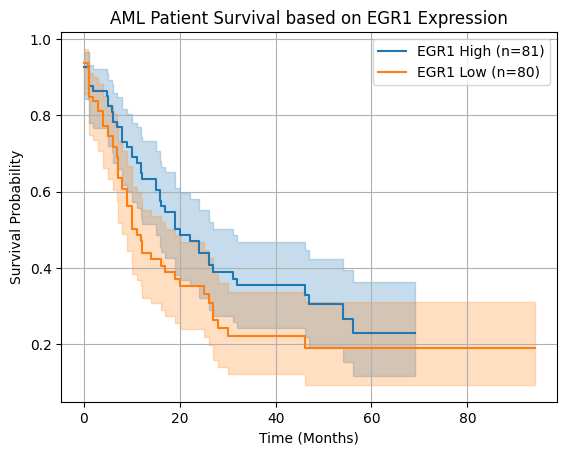


--- Log-Rank Test Results ---


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.22 0.07      3.78

In [58]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# 1. 그룹 나누기
median_expression = final_df['EGR1_EXPRESSION'].median()
high_group_filter = final_df['EGR1_EXPRESSION'] >= median_expression
low_group_filter = final_df['EGR1_EXPRESSION'] < median_expression

# 2. 카플란-마이어 생존 곡선 시각화
kmf_high = KaplanMeierFitter()
kmf_low = KaplanMeierFitter()

ax = plt.subplot(111)

# High 그룹
kmf_high.fit(durations=final_df[high_group_filter]['OS_MONTHS'],
             event_observed=final_df[high_group_filter]['EVENT'],
             label=f'EGR1 High (n={sum(high_group_filter)})')
kmf_high.plot_survival_function(ax=ax)

# Low 그룹
kmf_low.fit(durations=final_df[low_group_filter]['OS_MONTHS'],
            event_observed=final_df[low_group_filter]['EVENT'],
            label=f'EGR1 Low (n={sum(low_group_filter)})')
kmf_low.plot_survival_function(ax=ax)

# 그래프 제목 및 라벨 설정
ax.set_title('AML Patient Survival based on EGR1 Expression')
ax.set_xlabel('Time (Months)')
ax.set_ylabel('Survival Probability')
ax.grid(True)
plt.show()

# 3. 로그-순위 통계 검정
results = logrank_test(
    durations_A=final_df[high_group_filter]['OS_MONTHS'],
    durations_B=final_df[low_group_filter]['OS_MONTHS'],
    event_observed_A=final_df[high_group_filter]['EVENT'],
    event_observed_B=final_df[low_group_filter]['EVENT']
)

print("\n--- Log-Rank Test Results ---")
results.print_summary()